# Géométrie de caméra

In [2]:
import numpy as np

from matplotlib import pyplot as plt

x = [1, -1, -1,  1, 1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1]
y = [1,  1, -1, -1, 1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1]
z = [1,  1,  1,  1, 1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1]

M = np.array([[1, 2, 3], [4, 5, 6]])

Xcube = np.array([x,y,z,[1]*16])
print(Xcube)

[[ 1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]]


In [3]:
N = np.array([[1], [0], [0]])
print(M@N)

[[1]
 [4]]


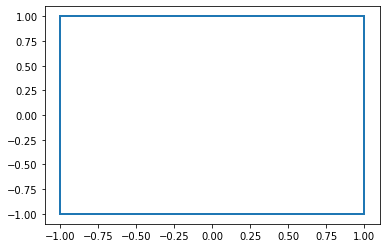

In [4]:
xi = Xcube[0, :]/Xcube[3, :]
yi = Xcube[1, :]/Xcube[3, :]
plt.plot(xi, yi)
plt.show()

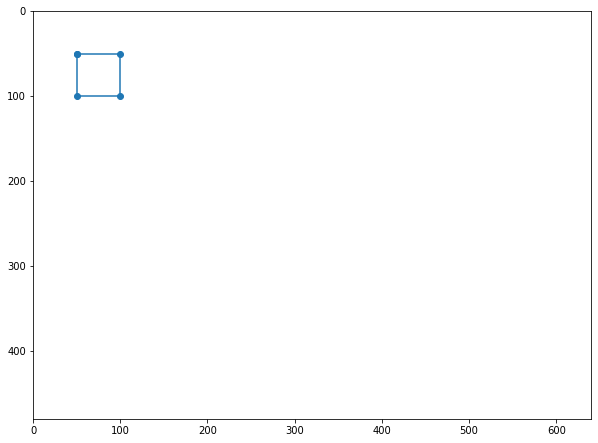

In [16]:
factor = 2.5
plt.figure(figsize=(4*factor, 3*factor))# taille de l'image en pouces
plt.axis([0, 640, 480, 0])
plt.plot([50, 50, 100, 100, 50], [50, 100, 100, 50, 50], "-o")# "-o" pour traits et cercle
plt.show()

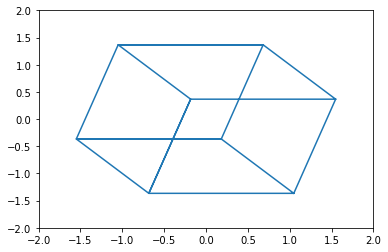

In [17]:
import math 

Rx = np.array(([1,0,0,0],[0,math.sqrt(3)/2,-1/2,0],[0, 1/2, math.sqrt(3)/2,0],[0,0,0,1])) #Rotation matrix around x
S = Rx@Xcube
Ry = np.array(([math.sqrt(3)/2,0,1/2,0],[0,1,0,0],[-1/2,0, math.sqrt(3)/2,0],[0,0,0,1])) #Rotation matrix around y
Mat = Ry@S

x_m = Mat[0, :]/Mat[3, :]
y_m = Mat[1, :]/Mat[3, :]

plt.axis([-2,2,-2,2])
plt.plot(x_m,y_m)
plt.show()

[[-3.97372056e+02 -2.43782217e+02 -9.36602540e+02 -1.09019238e+03
  -3.97372056e+02 -1.46339746e+03 -1.30980762e+03 -2.00262794e+03
  -2.15621778e+03 -1.46339746e+03 -1.30980762e+03 -2.43782217e+02
  -9.36602540e+02 -2.00262794e+03 -2.15621778e+03 -1.09019238e+03]
 [-7.76794919e+02 -2.86602540e+02 -1.30621778e+03 -1.79641016e+03
  -7.76794919e+02 -4.93782217e+02 -3.58983849e+00 -1.02320508e+03
  -1.51339746e+03 -4.93782217e+02 -3.58983849e+00 -2.86602540e+02
  -1.30621778e+03 -1.02320508e+03 -1.51339746e+03 -1.79641016e+03]
 [-1.45096189e+00 -2.31698730e+00 -4.04903811e+00 -3.18301270e+00
  -1.45096189e+00 -1.95096189e+00 -2.81698730e+00 -4.54903811e+00
  -3.68301270e+00 -1.95096189e+00 -2.81698730e+00 -2.31698730e+00
  -4.04903811e+00 -4.54903811e+00 -3.68301270e+00 -3.18301270e+00]]


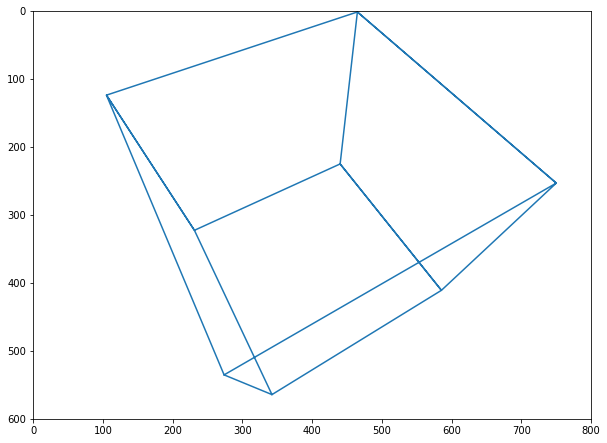

In [22]:
#import math.cos as cos
#import math.sin as sin

def rotate3D(theta, matrix):
    x = [math.cos(theta), 0, math.sin(theta)]
    y = [0, 1, 0]
    z = [-math.sin(theta), 0, math.cos(theta)]
    Oy = np.array([x, y, z])
    RC = np.array([[0, 0, 0, 1]])
    O = np.array([[0, 0, 0]])
    Ry = np.concatenate((Oy, O), axis=0)
    Ry = np.concatenate((Ry, RC.T), axis=1)
    x = [1, 0, 0]
    y = [0, math.cos(theta), -math.sin(theta)]
    z = [0, math.sin(theta), math.cos(theta)]
    Ox = np.array([x, y, z])
    Rx = np.concatenate((Ox, O), axis=0)
    Rx = np.concatenate((Rx, RC.T), axis=1)
    matrix = Ry @ matrix
    matrix = Rx @ matrix
    return matrix

def projection(matrix, m, f, px, py):
    #Projection Matrix
    x = [m*f, 0, px, 0]
    y = [0, -m*f, py, 0]
    z = [0, 0, 1, 0]
    P = np.array([x, y, z])
    #Y rotation
    x = [math.cos(0), 0, math.sin(0)]
    y = [0, 1, 0]
    z = [-math.sin(0), 0, math.cos(0)]
    Oy = np.array([x, y, z])
    RC = np.array([[0, 0, -3, 1]])
    O = np.array([[0, 0, 0]])
    Ry = np.concatenate((Oy, O), axis=0)
    Ry = np.concatenate((Ry, RC.T), axis=1)
    #Compute
    matrix = P @ Ry @ matrix
    return matrix
    
    
    

theta = 2*math.pi/3

test = projection(rotate3D(theta, Xcube), 500, 1, 400, 300)
print(test)
xi = test[0, :]/test[2, :]
yi = test[1, :]/test[2, :]
factor = 2.5
plt.figure(figsize=(4*factor, 3*factor)) # taille de l'image en pouces
plt.axis([0, 800, 600, 0])
plt.plot(xi, yi) 
plt.show()

# Calibration de caméra

<IPython.core.display.Javascript object>


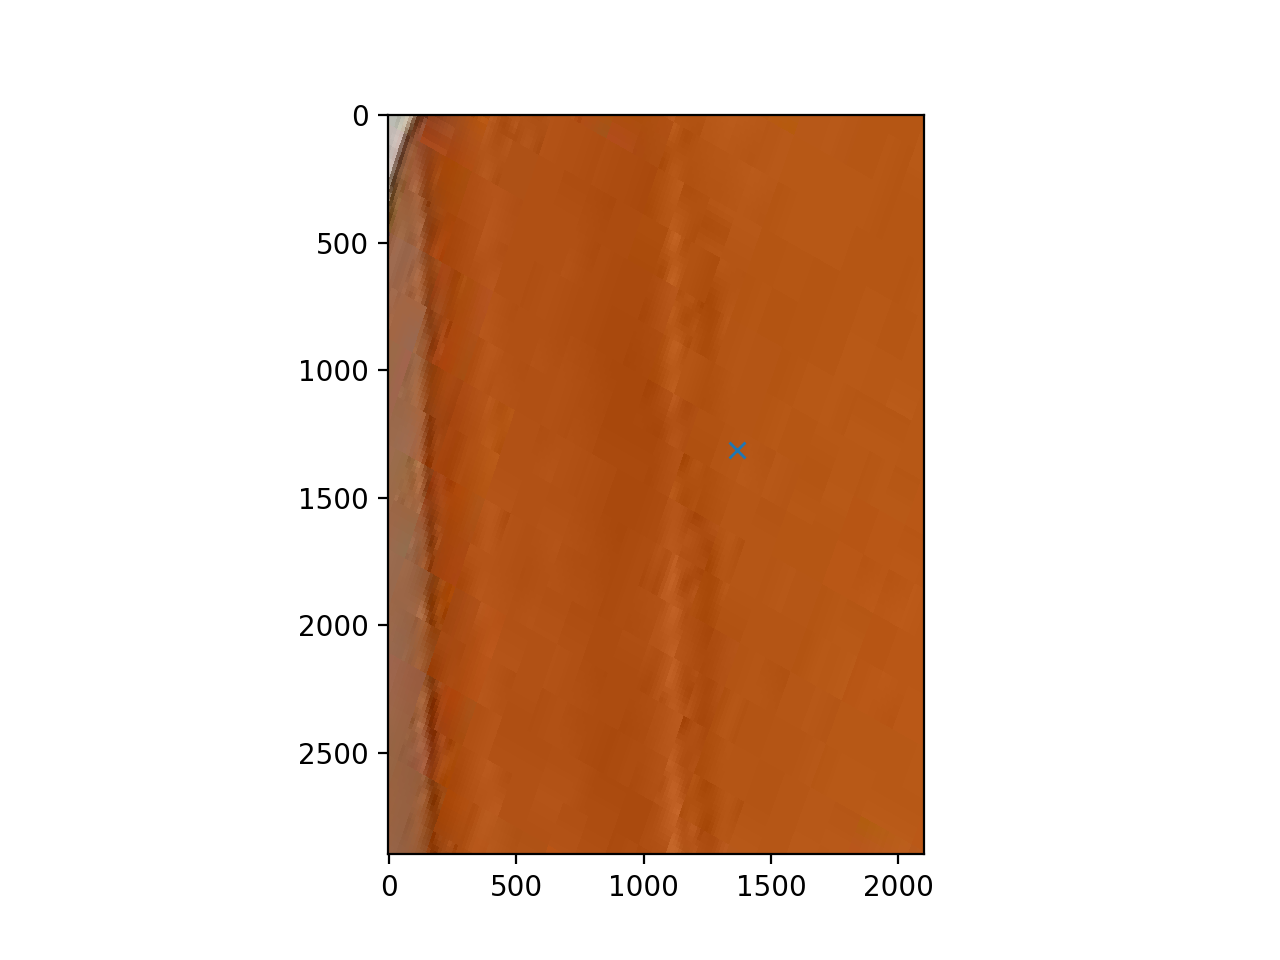

In [2]:
# import pour charger l'image
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt
import math
import matplotlib.image as mpimg

# pour rendre matplotlib interactif dans Jupyter et utiliser la souris
%matplotlib notebook

# Chargement de l'image
img = mpimg.imread('Couverture.jpg')

fig = plt.figure()
points = [[], []]

# fonction appelée à chaque click sur l'image
def onclick(event):
    # sauve le point
    points[0].append(event.xdata)
    points[1].append(event.ydata)
    # affiche une croix
    plt.plot([event.xdata], [event.ydata], "x")
    
# enregistrement de la fonction comme évenement
fig.canvas.mpl_connect('button_press_event', onclick)

# affichage de l'image
plt.imshow(img)
plt.show()

In [6]:
%matplotlib inline
print(points)

[[1860.9512987012988, 2992.37987012987, 3422.5097402597403, 2225.6266233766237], [1778.1103896103896, 1385.3831168831166, 1768.7597402597398, 2292.396103896104]]


In [3]:
def createMatriceWorld(image,world):
    x1i = image[0][0]
    y1i = image[1][0]
    
    x2i = image[0][1]
    y2i = image[1][1]
    
    x3i = image[0][2]
    y3i = image[1][2]
    
    x4i = image[0][3]
    y4i = image[1][3]
    
    x1w = world[0][0]
    y1w = world[1][0]
    
    x2w = world[0][1]
    y2w = world[1][1]
    
    x3w = world[0][2]
    y3w = world[1][2]
    
    x4w = world[0][3]
    y4w = world[1][3]
    
    a = [x1w, y1w, 1, 0, 0, 0, -x1i * x1w, -x1i * y1w]
    b = [0, 0, 0, x1w, y1w, 1, -y1i * x1w,-y1i * y1w]
    c = [x2w, y2w, 1, 0, 0, 0, -x2i * x2w, -x2i * y2w]
    d = [0, 0, 0, x2w, y2w, 1, -y2i * x2w,-y2i * y2w]
    e = [x3w, y3w, 1, 0, 0, 0, -x3i * x3w, -x3i * y3w]
    f = [0, 0, 0, x3w, y3w, 1, -y3i * x3w,-y3i * y3w]
    g = [x4w, y4w, 1, 0, 0, 0, -x4i * x4w, -x4i * y4w]
    h = [0, 0, 0, x4w, y4w, 1, -y4i * x4w,-y4i * y4w]
    
    matrix = np.array([a,b,c,d,e,f,g,h])
    matImage = np.array([x1i,y1i,x2i,y2i,x3i,y3i,x4i,y4i])
    return np.linalg.inv(matrix) @ matImage

print(points)

world = np.array([
    [0,20999,20999,0],
    [0,0,28999,28999]
])

monde = createMatriceWorld(points,world)
print(monde)

[[1365.3668831168832, 2618.3538961038957, 4039.652597402597, 2337.834415584415], [1310.5779220779218, 908.4999999999995, 2161.487012987013, 3012.396103896104]]
[ 7.39191132e-02  4.57793645e-03  1.36536688e+03 -1.42030264e-02
  2.13736571e-02  1.31057792e+03  5.44243603e-06 -1.23860710e-05]


In [ ]:
def rewriteMatrix(m):
    x = [m[0], m[1], m[2]]
    y = [m[3], m[4], m[5]]
    z = [m[6], m[7], 1]
    matrix = np.array([x, y, z])
    return matrix

newMatrix = rewriteMatrix(monde)
finalImg = []

for i in range(0, 2899):
    finalImg.append([])
    for j in range(0, 2099):
        coord = np.array([j, i, 1])
        coordImage = newMatrix @ coord
        normCoordImage = coordImage / coordImage[2]
        color = img[int(normCoordImage[1])][int(normCoordImage[0])]
        finalImg[i].append(color)
        
plt.imshow(finalImg)
plt.show()